What about between humidity and apparent temperature? Can you predict the apparent temperature given the humidity?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In /home/dongjun819/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/dongjun819/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/dongjun819/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/dongjun819/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/dongjun819/.local/lib/python3.6/site-packages/m

In [2]:
weather_data=pd.read_csv('weatherHistory.csv')
weather_data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [3]:
weather_data.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [5]:
humanity_app_temp=weather_data[['Apparent Temperature (C)','Humidity']]
humanity_app_temp

,Apparent Temperature (C),Humidity
0,7.388889,0.89
1,7.227778,0.86
2,9.377778,0.89
3,5.944444,0.83
4,6.977778,0.83
...,...,...
96448,26.016667,0.43
96449,24.583333,0.48
96450,22.038889,0.56
96451,21.522222,0.60


In [6]:
humanity_app_temp.describe()

,Apparent Temperature (C),Humidity
count,96453.000000,96453.000000
mean,10.855029,0.734899
std,10.696847,0.195473
min,-27.716667,0.000000
25%,2.311111,0.600000
50%,12.000000,0.780000
75%,18.838889,0.890000
max,39.344444,1.000000


In [7]:
humanity_app_temp.isnull().sum()

Apparent Temperature (C)    0
Humidity                    0
dtype: int64

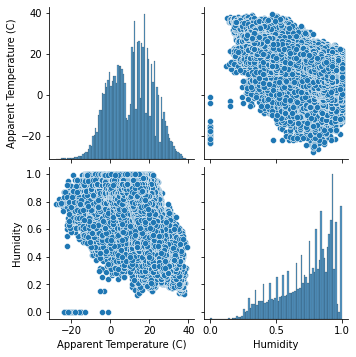

In [8]:
sns.pairplot(humanity_app_temp)

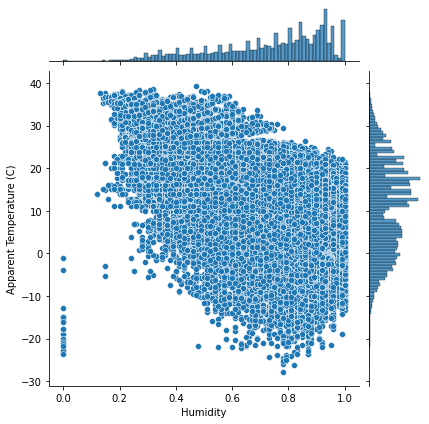

In [9]:
sns.jointplot(data=humanity_app_temp, x='Humidity', y='Apparent Temperature (C)')

In [10]:
X=humanity_app_temp[['Humidity']]
Y=humanity_app_temp[['Apparent Temperature (C)']]

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model = LinearRegression(normalize=True)
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [14]:
model.intercept_

array([35.15641483])

In [15]:
pred = model.predict(X_test)
print(pred)

[[ 9.99948135]
 [14.96466559]
 [ 3.3792357 ]
 ...
 [ 4.37227255]
 [ 9.00644451]
 [ 9.00644451]]


In [16]:
model.score(X_test,Y_test)

0.35721480743663747

Text(0, 0.5, 'Apparent Temperature (C))')

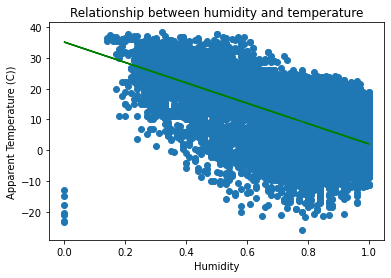

In [17]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, pred, color = 'g')
plt.title("Relationship between humidity and temperature")
plt.xlabel("Humidity")
plt.ylabel("Apparent Temperature (C))")

/home/dongjun819/.local/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


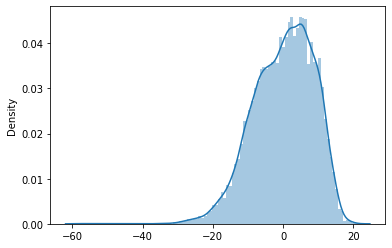

In [18]:
sns.distplot((Y_test-pred),bins=100);

In [19]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

In [20]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [21]:
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)

In [22]:
print_evaluate(Y_train,train_pred)

MAE: 6.963821565758622
MSE: 72.9872531161357
RMSE: 8.543257757795658
R2 Square 0.364487438377763
